In [36]:
def center(x):
    mean = np.mean(x, axis=1, keepdims=True)
    centered =  x - mean 
    return centered, mean

In [37]:
def covariance(x):
    mean = np.mean(x, axis=1, keepdims=True)
    print(mean)
    n = np.shape(x)[1] - 1
    m = x - mean

    return (m.dot(m.T))/n

In [38]:
def whiten(x):
    # Calculate the covariance matrix
    coVarM = covariance(X) 
    
    # Single value decoposition
    U, S, V = np.linalg.svd(coVarM)
    
    # Calculate diagonal matrix of eigenvalues
    d = np.diag(1.0 / np.sqrt(S)) 
    
    # Calculate whitening matrix
    whiteM = np.dot(U, np.dot(d, U.T))
    
    # Project onto whitening matrix
    Xw = np.dot(whiteM, X) 
    
    return Xw, whiteM

In [39]:
def fastIca(signals,  alpha = 1, thresh=1e-15, iterations=10000):
    m, n = signals.shape

    # Initialize random weights
    W = np.random.rand(m, m)

    for c in range(m):
        w = W[c, :].copy().reshape(m, 1)
        w = w / np.sqrt((w ** 2).sum())

        i = 0
        lim = 100
        while ((lim > thresh) & (i < iterations)):

            # Dot product of weight and signal
            ws = np.dot(w.T, signals)

            # Pass w*s into contrast function g
            wg = np.tanh(ws * alpha).T

            # Pass w*s into g prime 
            wg_ = (1 - np.square(np.tanh(ws))) * alpha

            # Update weights
            wNew = (signals * wg.T).mean(axis=1) - wg_.mean() * w.squeeze()

            # Decorrelate weights              
            wNew = wNew - np.dot(np.dot(wNew, W[:c].T), W[:c])
            wNew = wNew / np.sqrt((wNew ** 2).sum())

            # Calculate limit condition
            lim = np.abs(np.abs((wNew * w).sum()) - 1)
            
            # Update weights
            w = wNew
            
            # Update counter
            i += 1

        W[c, :] = w.T
    return W

In [40]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
from PIL import Image

# Load the images
image1 = np.array(Image.open('Recording-1.png'))
image2 = np.array(Image.open('Recording-2.png'))

In [41]:
# Flatten and concatenate the images
X = np.concatenate((image1.flatten(), image2.flatten())).reshape(2, -1)

In [42]:
# Center signals
Xc, meanX = center(X)

# Whiten mixed signals
Xw, whiteM = whiten(Xc)

[[126.67799162]
 [125.04345238]]


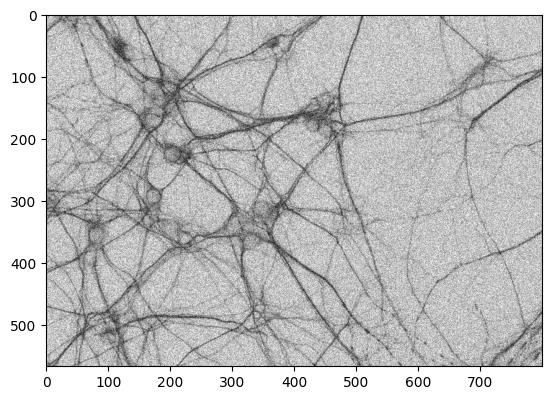

In [43]:
plt.imshow(Xw[0].reshape((image1.shape[0], image1.shape[1])), cmap = 'gray')

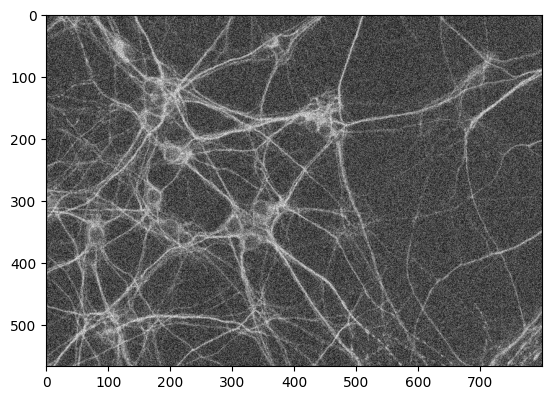

In [44]:
plt.imshow(Xw[1].reshape((image1.shape[0], image1.shape[1])), cmap = 'gray')

In [45]:
W = fastIca(Xw,  alpha=10)

#Un-mix signals using 
unMixed = Xw.T.dot(W.T)

# Subtract mean
unMixed = (unMixed.T - meanX).T

In [46]:
unMixed

array([[-126.5872349 , -123.17025741],
       [-126.7580571 , -123.39581777],
       [-126.93010377, -121.86963874],
       ...,
       [-126.78433744, -123.43051937],
       [-126.69235626, -123.30906379],
       [-126.49402925, -124.80054122]])

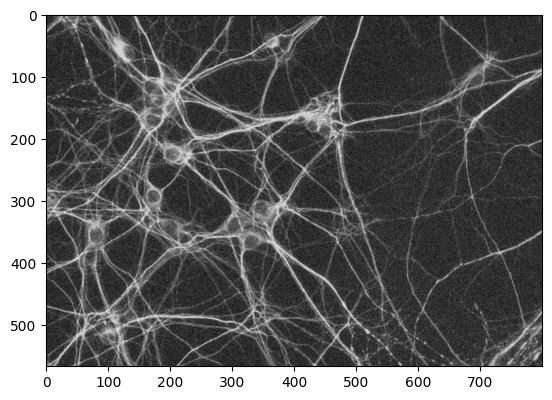

In [47]:
plt.imshow(unMixed[:,0].reshape((image1.shape[0], image1.shape[1])), cmap = 'gray')